# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import sys
sys.path.append('E:/udacity_deep_reinforcement_learning/deep-reinforcement-learning-master/python')

In [2]:
import matplotlib.pyplot as plt
import json

import numpy as np
import random
import copy
from collections import namedtuple, deque

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [4]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [7]:
for i in range(1, 100):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.09000000171363354
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.09000000171363354
Score (max over agents) from episode 5: 0.0
Score (max over agents) from episode 6: 0.0
Score (max over agents) from episode 7: 0.0
Score (max over agents) from episode 8: 0.10000000149011612
Score (max over agents) from episode 9: 0.0
Score (max over agents) from episode 10: 0.0
Score (max over agents) from episode 11: 0.0
Score (max over agents) from episode 12: 0.0
Score (max over agents) from episode 13: 0.0
Score (max over agents) from episode 14: 0.09000000171363354
Score (max over agents) from episode 15: 0.0
Score (max over agents) from episode 16: 0.0
Score (max over agents) from episode 17: 0.0
Score (max over agents) from episode 18: 0.0
Score (max over agents) from episode 19: 0.0
Score (max over agents) from episode 20: 0.0
Score (max over agents) from episode 21: 0.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## Define methods to be used for training

In next two cells, I have defined three methods that will be used during the training:

* reduce_learning_rate: This method reduces learning rate of optimizer by a factor
* learning_rate_adjustment_needed: This method checks whether learning rate adjustment is needed
* perform_maddpg_training: This method does the actual training using MADDPG learning algorithm. 
- It takes, hidden layer and path for best model as parameters. 
- If after 100 episodes the mean score does not increase by 0.05  over last 100 episdes, learning rate is reduced by a factor 0.7
- In addition to scores, I have added mean_score_list which will store mean score after each episode 


In [8]:
def reduce_learning_rate(optimizer, episode, factor):
    """Reduce the learning rate by multiplying factor applicable only if epoch is more than 400
       Parameters:
       optimizer: Optimizer Used
       episode: Current Episode
       factor: The multiplication factory by which learning rate needs to be reduced
    """
    # If episode is less than 400, do not do anything
    if episode <=400:
        return
    
    # Update the learning Rate by multiplying by factor and update only if
    # new learning rate is not less than 1e-6
    for param_group in optimizer.param_groups:
        change_lr_value=np.around(param_group['lr']*factor, 8)
        if change_lr_value <= 0.000001:
            change_lr_value = 0.000001  
        param_group['lr'] = change_lr_value
        print("\nAs mean score over 100 episodes did not improve by 1.0 after 100 episodes, learning rate has been changed to: " +str(param_group['lr']))
            
def learning_rate_adjustment_needed(mean_score_list, episode, episode_last_lr_update):
    """This method finds out if adjustment of learning rate is needed or not. 
       The logic is find the difference between current mean score and the mean score 
       100 episodes back. If the diffrence is less than 1.0, then learning rate adjustment is needed
       and the method will return True, else the method will return False
      
       Parameters:
       mean_score_list: List
       episode: Current Episode
       factor: The multiplication factory by which learning rate needs to be reduced
    """
    if episode-episode_last_lr_update < 100:
        return False
    if len(mean_score_list) < 100:
        return False
    mean_score_current = mean_score_list[-1]
    mean_score_100_before = mean_score_list[-100]
    # If difference between current mean score and the mena score 100 episodes bere
    # are less than 0.05 then, learning rate needs to be adjusted
    if (mean_score_current - mean_score_100_before) < 0.05:
        return True
    else:
        return False
    
seed=72
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
SKIP_INITIAL_EPISODES_COUNT=400

In [9]:
from MADDPG import MADDPG

def perform_maddpg_training( hidden_layers_actor, hidden_layers_critic, best_model_actor_save_path, best_model_critic_save_path,
                            n_episodes=3000, t_max=2000, learning_rate_reduction_factor=0.7):
    global env_info
    state_size=env_info.vector_observations.shape[1]
    action_size=brain.vector_action_space_size
    num_agents=env_info.vector_observations.shape[0]
  
    multi_agent = MADDPG(state_size=state_size, action_size=action_size, num_agents=num_agents, hidden_layers_actor=hidden_layers_actor, hidden_layers_critic=hidden_layers_critic)
  
    scores_deque = deque(maxlen=100)
    scores_list = []
    mean_of_last_100_list = []
    episode_last_lr_update = 0
        
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment
        states = env_info.vector_observations                   # get the current states (for all agents)
        multi_agent.reset()
        scores = np.zeros(num_agents)                          # initialize the score (for each agent in MADDPG)
        num_steps = 0
        for _ in range(t_max):
            actions = multi_agent.act(states, i_episode)
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent in MADDPG)
            rewards = env_info.rewards                         # get rewards (for each agent in MADDPG)
            dones = env_info.local_done                        # see if episode finished
            scores += rewards                                  # update the score (for each agent in MADDPG)
            
            # For Initial 200 episodes, skip learning and just add to replay buffer
            if i_episode < SKIP_INITIAL_EPISODES_COUNT:
                multi_agent.add_to_replay_buffer(i_episode, states, actions, rewards, next_states, dones)
            else:
                multi_agent.step(i_episode, states, actions, rewards, next_states, dones) #train the MADDPG_obj           
            states = next_states                               # roll over states to next time step
            num_steps += 1
            if np.any(dones):                                  # exit loop if episode finished
                break
           
        scores_deque.append(np.max(scores))
        scores_list.append(np.max(scores))
        mean_of_last_100_list.append(np.mean(scores_deque))
        
                
        print('Episode: {}\tLast 100 Average Score: {:.4f}\tCurrent Score: {:.4f}'.format(i_episode, np.mean(scores_deque), np.max(scores)))
              
        if len(mean_of_last_100_list) >= 1 and np.mean(scores_deque) > np.max(mean_of_last_100_list):
            multi_agent.save_maddpg(best_model_actor_file, best_model_critic_file)
            print('Saved Model: Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if len(scores_deque) >= 100 and np.mean(scores_deque) > 0.5:
            multi_agent.save_maddpg(best_model_actor_file, best_model_critic_file)
            print("Environment is solved in {} Episodes",format(i_episode))
            break
            
        mean_of_last_100_list.append(np.mean(scores_deque))
        
        # If there is no change in mean score for last 100 episodes, reduce learning rate
        if learning_rate_adjustment_needed(mean_of_last_100_list, i_episode, episode_last_lr_update):
            reduce_learning_rate(multi_agent.get_actor_optimizer(), i_episode, learning_rate_reduction_factor)
            reduce_learning_rate(multi_agent.get_critic_optimizer(), i_episode, learning_rate_reduction_factor)
            episode_last_lr_update = i_episode
            
    return scores_list, mean_last_100_list

## Try with actor and critic having hidden layers 128x256x128

In [10]:
import time
best_model_actor_save_path="tennis_best_model_actor.pth"
best_model_critic_save_path="tennis_best_model_critic.pth"

scores_list, mean_last_100_list = perform_maddpg_training( hidden_layers_actor=(128,256,128),
                                                                                hidden_layers_critic=(128,256,128),
                                                                                best_model_actor_save_path=best_model_actor_save_path, 
                                                                                best_model_critic_save_path=best_model_critic_save_path, 
                                                                                n_episodes=10000, t_max=2000, learning_rate_reduction_factor=0.7)


E:\anaconda\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode: 1	Last 100 Average Score: 0.0000	Current Score: 0.0000
Episode: 2	Last 100 Average Score: 0.0000	Current Score: 0.0000
Episode: 3	Last 100 Average Score: 0.0333	Current Score: 0.1000
Episode: 4	Last 100 Average Score: 0.0500	Current Score: 0.1000
Episode: 5	Last 100 Average Score: 0.0400	Current Score: 0.0000
Episode: 6	Last 100 Average Score: 0.0333	Current Score: 0.0000
Episode: 7	Last 100 Average Score: 0.0286	Current Score: 0.0000
Episode: 8	Last 100 Average Score: 0.0250	Current Score: 0.0000
Episode: 9	Last 100 Average Score: 0.0222	Current Score: 0.0000
Episode: 10	Last 100 Average Score: 0.0200	Current Score: 0.0000
Episode: 11	Last 100 Average Score: 0.0273	Current Score: 0.1000
Episode: 12	Last 100 Average Score: 0.0325	Current Score: 0.0900
Episode: 13	Last 100 Average Score: 0.0300	Current Score: 0.0000
Episode: 14	Last 100 Average Score: 0.0279	Current Score: 0.0000
Episode: 15	Last 100 Average Score: 0.0260	Current Score: 0.0000
Episode: 16	Last 100 Average Score

Episode: 129	Last 100 Average Score: 0.0117	Current Score: 0.0000
Episode: 130	Last 100 Average Score: 0.0126	Current Score: 0.0900
Episode: 131	Last 100 Average Score: 0.0126	Current Score: 0.0000
Episode: 132	Last 100 Average Score: 0.0126	Current Score: 0.0000
Episode: 133	Last 100 Average Score: 0.0116	Current Score: 0.0000
Episode: 134	Last 100 Average Score: 0.0116	Current Score: 0.0000
Episode: 135	Last 100 Average Score: 0.0126	Current Score: 0.1000
Episode: 136	Last 100 Average Score: 0.0136	Current Score: 0.1000
Episode: 137	Last 100 Average Score: 0.0136	Current Score: 0.0000
Episode: 138	Last 100 Average Score: 0.0136	Current Score: 0.0000
Episode: 139	Last 100 Average Score: 0.0136	Current Score: 0.0000
Episode: 140	Last 100 Average Score: 0.0127	Current Score: 0.0000
Episode: 141	Last 100 Average Score: 0.0127	Current Score: 0.0000
Episode: 142	Last 100 Average Score: 0.0127	Current Score: 0.0000
Episode: 143	Last 100 Average Score: 0.0127	Current Score: 0.0000
Episode: 1

Episode: 257	Last 100 Average Score: 0.0127	Current Score: 0.0000
Episode: 258	Last 100 Average Score: 0.0117	Current Score: 0.0000
Episode: 259	Last 100 Average Score: 0.0117	Current Score: 0.0000
Episode: 260	Last 100 Average Score: 0.0127	Current Score: 0.1000
Episode: 261	Last 100 Average Score: 0.0127	Current Score: 0.0000
Episode: 262	Last 100 Average Score: 0.0127	Current Score: 0.0000
Episode: 263	Last 100 Average Score: 0.0137	Current Score: 0.1000
Episode: 264	Last 100 Average Score: 0.0137	Current Score: 0.0000
Episode: 265	Last 100 Average Score: 0.0137	Current Score: 0.0000
Episode: 266	Last 100 Average Score: 0.0137	Current Score: 0.0000
Episode: 267	Last 100 Average Score: 0.0137	Current Score: 0.0000
Episode: 268	Last 100 Average Score: 0.0127	Current Score: 0.0000
Episode: 269	Last 100 Average Score: 0.0127	Current Score: 0.0000
Episode: 270	Last 100 Average Score: 0.0127	Current Score: 0.0000
Episode: 271	Last 100 Average Score: 0.0127	Current Score: 0.0000
Episode: 2

Episode: 382	Last 100 Average Score: 0.0164	Current Score: 0.0000
Episode: 383	Last 100 Average Score: 0.0164	Current Score: 0.0000
Episode: 384	Last 100 Average Score: 0.0155	Current Score: 0.0000
Episode: 385	Last 100 Average Score: 0.0155	Current Score: 0.0000
Episode: 386	Last 100 Average Score: 0.0155	Current Score: 0.0000
Episode: 387	Last 100 Average Score: 0.0155	Current Score: 0.0000
Episode: 388	Last 100 Average Score: 0.0155	Current Score: 0.0000
Episode: 389	Last 100 Average Score: 0.0155	Current Score: 0.0000
Episode: 390	Last 100 Average Score: 0.0145	Current Score: 0.0000
Episode: 391	Last 100 Average Score: 0.0145	Current Score: 0.0000
Episode: 392	Last 100 Average Score: 0.0145	Current Score: 0.0000
Episode: 393	Last 100 Average Score: 0.0145	Current Score: 0.0000
Episode: 394	Last 100 Average Score: 0.0155	Current Score: 0.1000
Episode: 395	Last 100 Average Score: 0.0155	Current Score: 0.0000
Episode: 396	Last 100 Average Score: 0.0155	Current Score: 0.0000
Episode: 3

Episode: 503	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 504	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 505	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 506	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 507	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 508	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 509	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 510	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 511	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 512	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 513	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 514	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 515	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 516	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 517	Last 100 Average Score: 0.0047	Current Score: 0.0000
Episode: 5

Episode: 624	Last 100 Average Score: 0.0437	Current Score: 0.1000
Episode: 625	Last 100 Average Score: 0.0446	Current Score: 0.0900
Episode: 626	Last 100 Average Score: 0.0456	Current Score: 0.1000
Episode: 627	Last 100 Average Score: 0.0465	Current Score: 0.0900
Episode: 628	Last 100 Average Score: 0.0475	Current Score: 0.1000
Episode: 629	Last 100 Average Score: 0.0485	Current Score: 0.1000
Episode: 630	Last 100 Average Score: 0.0486	Current Score: 0.1000
Episode: 631	Last 100 Average Score: 0.0486	Current Score: 0.1000
Episode: 632	Last 100 Average Score: 0.0496	Current Score: 0.1000
Episode: 633	Last 100 Average Score: 0.0506	Current Score: 0.1000
Episode: 634	Last 100 Average Score: 0.0506	Current Score: 0.1000
Episode: 635	Last 100 Average Score: 0.0506	Current Score: 0.0000
Episode: 636	Last 100 Average Score: 0.0526	Current Score: 0.2000
Episode: 637	Last 100 Average Score: 0.0556	Current Score: 0.4000
Episode: 638	Last 100 Average Score: 0.0566	Current Score: 0.1000
Episode: 6

Episode: 745	Last 100 Average Score: 0.0662	Current Score: 0.1000
Episode: 746	Last 100 Average Score: 0.0712	Current Score: 0.5000
Episode: 747	Last 100 Average Score: 0.0712	Current Score: 0.0000
Episode: 748	Last 100 Average Score: 0.0692	Current Score: 0.0000
Episode: 749	Last 100 Average Score: 0.0701	Current Score: 0.1900
Episode: 750	Last 100 Average Score: 0.0710	Current Score: 0.0900
Episode: 751	Last 100 Average Score: 0.0710	Current Score: 0.0000
Episode: 752	Last 100 Average Score: 0.0720	Current Score: 0.2000
Episode: 753	Last 100 Average Score: 0.0720	Current Score: 0.1000
Episode: 754	Last 100 Average Score: 0.0739	Current Score: 0.1900
Episode: 755	Last 100 Average Score: 0.0759	Current Score: 0.2000
Episode: 756	Last 100 Average Score: 0.0759	Current Score: 0.1000
Episode: 757	Last 100 Average Score: 0.0769	Current Score: 0.1000
Episode: 758	Last 100 Average Score: 0.0768	Current Score: 0.0900
Episode: 759	Last 100 Average Score: 0.0758	Current Score: 0.0000
Episode: 7

Episode: 866	Last 100 Average Score: 0.1207	Current Score: 0.1000
Episode: 867	Last 100 Average Score: 0.1227	Current Score: 0.2000
Episode: 868	Last 100 Average Score: 0.1238	Current Score: 0.2000
Episode: 869	Last 100 Average Score: 0.1248	Current Score: 0.1000
Episode: 870	Last 100 Average Score: 0.1258	Current Score: 0.1000
Episode: 871	Last 100 Average Score: 0.1268	Current Score: 0.3000
Episode: 872	Last 100 Average Score: 0.1288	Current Score: 0.2000
Episode: 873	Last 100 Average Score: 0.1289	Current Score: 0.1000
Episode: 874	Last 100 Average Score: 0.1308	Current Score: 0.1900
Episode: 875	Last 100 Average Score: 0.1317	Current Score: 0.1900
Episode: 876	Last 100 Average Score: 0.1347	Current Score: 0.4000
Episode: 877	Last 100 Average Score: 0.1357	Current Score: 0.1000
Episode: 878	Last 100 Average Score: 0.1367	Current Score: 0.2000
Episode: 879	Last 100 Average Score: 0.1387	Current Score: 0.2000
Episode: 880	Last 100 Average Score: 0.1377	Current Score: 0.1000
Episode: 8

Episode: 987	Last 100 Average Score: 0.1701	Current Score: 0.3000
Episode: 988	Last 100 Average Score: 0.1671	Current Score: 0.0000
Episode: 989	Last 100 Average Score: 0.1681	Current Score: 0.2000
Episode: 990	Last 100 Average Score: 0.1681	Current Score: 0.1000
Episode: 991	Last 100 Average Score: 0.1681	Current Score: 0.1000
Episode: 992	Last 100 Average Score: 0.1672	Current Score: 0.1000
Episode: 993	Last 100 Average Score: 0.1662	Current Score: 0.1000
Episode: 994	Last 100 Average Score: 0.1672	Current Score: 0.4000
Episode: 995	Last 100 Average Score: 0.1632	Current Score: 0.1000
Episode: 996	Last 100 Average Score: 0.1582	Current Score: 0.1000
Episode: 997	Last 100 Average Score: 0.1572	Current Score: 0.1000
Episode: 998	Last 100 Average Score: 0.1612	Current Score: 0.4000
Episode: 999	Last 100 Average Score: 0.1612	Current Score: 0.0000
Episode: 1000	Last 100 Average Score: 0.1612	Current Score: 0.0000

As mean score over 100 episodes did not improve by 1.0 after 100 episodes,

Episode: 1106	Last 100 Average Score: 0.3239	Current Score: 0.8000
Episode: 1107	Last 100 Average Score: 0.3249	Current Score: 0.3000
Episode: 1108	Last 100 Average Score: 0.3239	Current Score: 0.0000
Episode: 1109	Last 100 Average Score: 0.3480	Current Score: 2.6000
Episode: 1110	Last 100 Average Score: 0.3440	Current Score: 0.0000
Episode: 1111	Last 100 Average Score: 0.3440	Current Score: 0.1000
Episode: 1112	Last 100 Average Score: 0.3480	Current Score: 0.5000
Episode: 1113	Last 100 Average Score: 0.3480	Current Score: 0.2000
Episode: 1114	Last 100 Average Score: 0.3489	Current Score: 0.1900
Episode: 1115	Last 100 Average Score: 0.3498	Current Score: 0.1900
Episode: 1116	Last 100 Average Score: 0.3478	Current Score: 0.1000
Episode: 1117	Last 100 Average Score: 0.3458	Current Score: 0.0000
Episode: 1118	Last 100 Average Score: 0.3499	Current Score: 0.7000
Episode: 1119	Last 100 Average Score: 0.3649	Current Score: 1.7000
Episode: 1120	Last 100 Average Score: 0.3679	Current Score: 0.

## Plot scores vs episodes

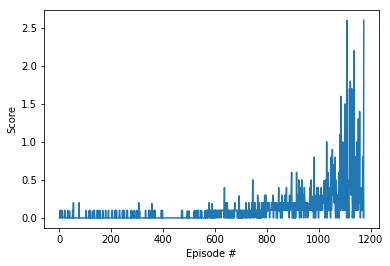

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_list)+1), scores_list)
plt.ylabel("Score")
plt.xlabel("Episode #")
plt.show()

## Plot mean scores over 100 consecutive episodes vs episode

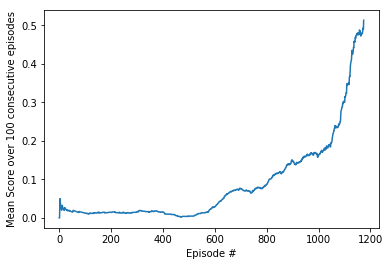

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(mean_last_100_list)+1), mean_last_100_list)
plt.ylabel("Mean Score over 100 consecutive episodes")
plt.xlabel("Episode #")
plt.show()

## Conclusion

I have used MADDPG algorithm for training two tennis players. The environment is solved by getting a score of 0.5131 in 1174 episodes

## Further Improvement

Furhter improvement can be done using

i. Prioritized Experience Replay
ii.	Robust Multi-Agent Reinforcement Learning via Minimax Deep Deterministic Policy Gradient (https://people.eecs.berkeley.edu/~russell/papers/aaai19-marl.pdf)